In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
IRLdata = []
outputs = [] 
residuals = []
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Data/us 21.csv')
data = data.head(21)

for i in range(len(data.cases)):
  IRLdata.insert(i, data.cases[i])

data

,date,cases,deaths
0,2020/7/1,2703296,128104
1,2020/7/2,2758851,128827
2,2020/7/3,2815374,129417
3,2020/7/4,2866014,129679
4,2020/7/5,2910780,129941
5,2020/7/6,2958095,130332
6,2020/7/7,3012252,131290
7,2020/7/8,3071711,132238
8,2020/7/9,3131610,133079
9,2020/7/10,3199837,133907


In [ ]:
predictions = pd.read_csv("/content/drive/My Drive/Data/21 Logistic_Predictions.csv")
#The line above: Due to some formating, there were many redundent rows in
#the inital file, so, when using, please just select the first 21 rows -Sarah
for i in range(len(predictions.cases)):
  outputs.insert(i, predictions.cases[i])

predictions

,date,cases
0,2020/7/1,2400000.0
1,2020/7/2,2410000.0
2,2020/7/3,2420000.0
3,2020/7/4,2430000.0
4,2020/7/5,2440000.0
5,2020/7/6,2440000.0
6,2020/7/7,2450000.0
7,2020/7/8,2460000.0
8,2020/7/9,2470000.0
9,2020/7/10,2470000.0


In [ ]:
print(outputs)
print("length of outputs: "+ str(len(outputs)))
print("length of IRLdata "+ str(len(IRLdata)))

[2400000.0, 2410000.0, 2420000.0, 2430000.0, 2440000.0, 2440000.0, 2450000.0, 2460000.0, 2470000.0, 2470000.0, 2480000.0, 2490000.0, 2490000.0, 2500000.0, 2500000.0, 2510000.0, 2510000.0, 2520000.0, 2520000.0, 2530000.0, 2530000.0]
length of outputs: 21
length of IRLdata 21


In [ ]:
rms = sqrt(mean_squared_error(IRLdata, outputs))
print(rms)

869936.8048626673


In [ ]:
def calcResiduals(y_i, y): 
  r_i = y_i - y #r_i = ith residual, y_i = ith y value, y = predicted y value
  return r_i

In [ ]:
def calcRMSD():
  Rsquared = []
  sum = 0

  for x in range(len(residuals)):
    Rsquared.insert(x,residuals[x]*residuals[x])

    for x in range(len(Rsquared)):
      sum += Rsquared[x]

  MSD = sum/(len(Rsquared))
  RMSD = math.sqrt(MSD)

  return RMSD

In [ ]:
for x in range (len(IRLdata)):
  residual = calcResiduals(IRLdata[x], outputs[x])
  residuals.insert(x,residual)

print("residuals: "+ str(residuals))
print("RMSD: "+str(calcRMSD()))

residuals: [303296.0, 348851.0, 395374.0, 436014.0, 470780.0, 518095.0, 562252.0, 611711.0, 661610.0, 729837.0, 780565.0, 828372.0, 889943.0, 945544.0, 1013892.0, 1079589.0, 1150512.0, 1202966.0, 1265241.0, 1315124.0, 1380398.0]
RMSD: 2241286.6540520764


In [ ]:
len(residuals)

21

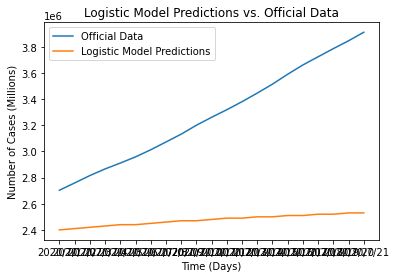

In [ ]:
x = data.date
#Will actual dates work? As shown in the generated graph, 
#the time is not very well-defined...? -Sarah
y1 = data.cases
y2 = predictions.cases

plt.plot(x, y1, label="Official Data")
plt.plot(x, y2, label="Logistic Model Predictions")

plt.xlabel("Time (Days)")
plt.ylabel("Number of Cases (Millions)")
plt.title("Logistic Model Predictions vs. Official Data")

plt.legend()
plt.show()
#Yay! The Losgistic one looks a lot more realistic than the exponential one
#It is below the real life data, hmmm... -S